In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "font.size": 22
})

In [2]:
G = {
    "A": [("B", 2), ("C", 5)],
    "B": [("C", 1)],
    "C": [],
}
pos = {
    "A": (0, 0),
    "B": (2, 0),
    "C": (1, 1),
}


(0.0, 1.0, 0.0, 1.0)

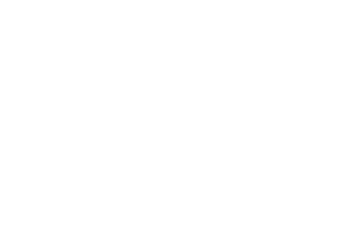

In [3]:
fig, ax = plt.subplots()
ax.axis('off') 

In [14]:
from IPython.display import HTML

file = []
heappush(file, (0, "A"))
dist = {
    "A": 0,
    "B": float("inf"),
    "C": float("inf"),
}
vus = { v: False for v in dist }

def dist_to_str(d):
    if d == float("inf"):
        return "inf"
    return str(d)

T = {}
for v in pos:
    x, y = pos[v]
    ax.scatter(x, y, s=100)
    T[v] = ax.text(x, y, dist_to_str(dist[v]))

                   
def dijkstra():
    while True:
        v_min = -1
        for v in dist:
            if not vus[v] and (v_min == -1 or dist[v] < dist[v_min]):
                v_min = v
        if v_min == -1:
            return
        vus[v_min] = True
        T[v_min].set_color("red")
        yield
        for v, w in G[v_min]:
            if dist[v_min] + w < dist[v]:
                dist[v] = dist[v_min] + w
                T[v].set_text(dist_to_str(dist[v]))
                yield

dij = dijkstra()
                   
def update(i):
    next(dij)
                   
anim = FuncAnimation(fig, update, frames=5, interval=2000, blit=False)
# anim.save('anim.gif')
HTML(anim.to_html5_video())

RuntimeError: latex was not able to process the following string:
b'$\\\\infty'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/qfortier/.cache/matplotlib/tex.cache/1e949bf4ff49a3425aaa3f939f1269b6.te
x
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
(./1e949bf4ff49a3425aaa3f939f1269b6.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/ot1phv.fd)
! Extra }, or forgotten $.
l.19 {\sffamily $\infty}
                        
No pages of output.
Transcript written on 1e949bf4ff49a3425aaa3f939f1269b6.log.


